# Image Denoising
This notebook implements various noise addition and denoising techniques for image processing.

In [115]:
import matplotlib.image as mpimg
import numpy as np
import random
import matplotlib.pyplot as plt

## Noise Addition Functions

In [116]:
def add_salt_pepper_noise(img, prob):
    result = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if random.random() < prob:
                result[i][j] = 0 if random.random() < 0.5 else 255
    return result

In [117]:
def add_impulse_noise(img, prob):
    result = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if random.random() < prob:
                result[i][j] = 255  # Only add white noise for impulse
    return result

In [118]:
def add_gaussian_noise(img, mean, std):
    # randomly select a sample from a normal distribution for each pixel
    noise = np.random.normal(mean, std, img.shape).astype(np.uint8)
    result = img.copy() + noise
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

## Denoising Functions

In [119]:
def median_filter(img):
    def median(window):
        array = np.sort(window.flatten()) 
        # flatten means the 3x3 window become 1x9 array, then sort it to get median
        return array[len(array) // 2]
    
    # we use default window size 3x3
    result = img.copy()
    pad_img = np.pad(img, ((1, 1), (1, 1)), 'constant', constant_values=0)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            window = pad_img[i:i+3, j:j+3]
            result[i][j] = median(window)
            
    return result

In [120]:
def mean_filter(img):
    def mean(window):
        return np.mean(window)

    # we use default window size 3x3
    result = img.copy()
    pad_img = np.pad(img, ((1, 1), (1, 1)), "constant", constant_values=0)

    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            window = pad_img[i:i+3, j:j+3]
            result[i][j] = mean(window)

    return result

In [121]:

def generate_gaussian_kernel(size, sigma=1.0):
    x = np.linspace(-size // 2, size // 2, size)
    x_gauss = np.exp(-(x**2) / (2 * sigma**2))
    kernel_2d = np.outer(x_gauss, x_gauss)
    kernel_2d /= kernel_2d.sum()  
    return kernel_2d


def gaussian_filter(img, size=3, sigma=1.0):
    kernel = generate_gaussian_kernel(size, sigma)
    result = img.copy().astype(np.float32) / 255.0
    print("gauss:", kernel)
    
    pad_img = np.pad(result, ((size // 2, size // 2), (size // 2, size // 2)), "constant", constant_values=0)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            window = pad_img[i:i+size, j:j+size]
            result[i][j] = np.sum(window * kernel)

    return (result * 255.0).clip(0, 255).astype(np.uint8)


In [122]:
def psnr(img1, img2):
    # Implement PSNR calculation  
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))  
    return psnr_value

## Experiment with Different Noise Types and Filters

(772, 709)


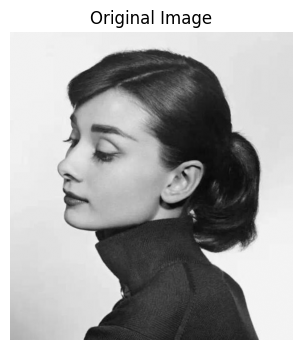

In [123]:
path = 'Hepburn.jpeg'
img = mpimg.imread(path)
print(img.shape)

# Display original image
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Salt and Pepper Noise

gauss: [[0.00694154 0.04526454 0.03110983]
 [0.04526454 0.29516189 0.2028616 ]
 [0.03110983 0.2028616  0.13942461]]


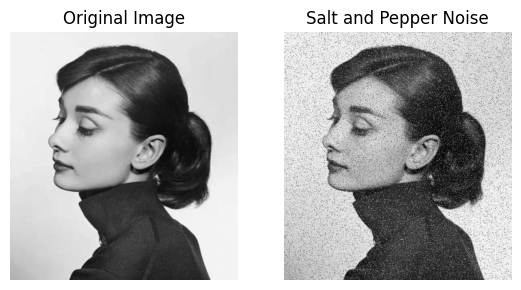

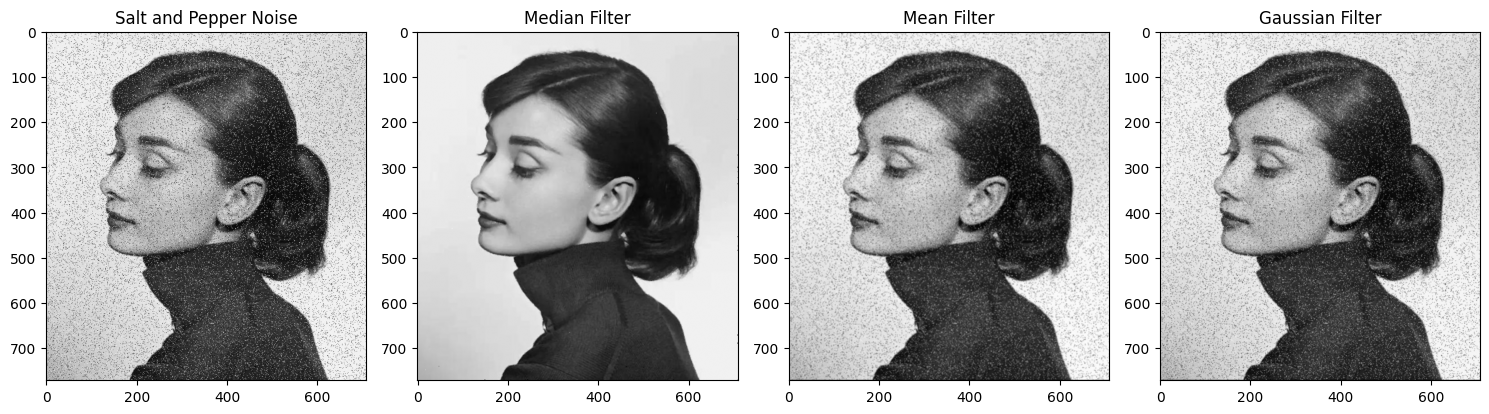

In [124]:
# Add salt and pepper noise
salt_pepper_img = add_salt_pepper_noise(img, 0.1)

# Display noisy image and the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(salt_pepper_img, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')

# Apply filters
median_denoised_img = median_filter(salt_pepper_img)
mean_denoised_img = mean_filter(salt_pepper_img)
gaussian_denoised_img = gaussian_filter(salt_pepper_img, size=3, sigma=1.0)

# Display denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(salt_pepper_img, cmap='gray')
plt.title('Salt and Pepper Noise')

plt.subplot(1, 4, 2)
plt.imshow(median_denoised_img, cmap='gray')
plt.title('Median Filter')

plt.subplot(1, 4, 3)
plt.imshow(mean_denoised_img, cmap='gray')
plt.title('Mean Filter')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_denoised_img, cmap='gray')
plt.title('Gaussian Filter')

plt.tight_layout()
plt.show()

### Impulse Noise

gauss: [[0.08584826 0.10573274 0.10141773]
 [0.10573274 0.13022295 0.12490848]
 [0.10141773 0.12490848 0.11981089]]


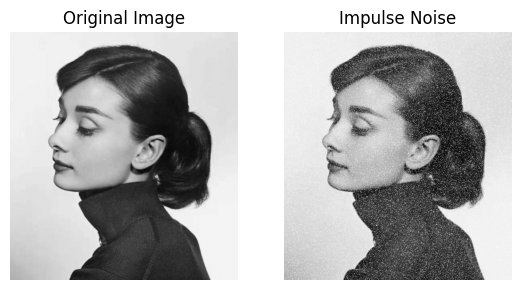

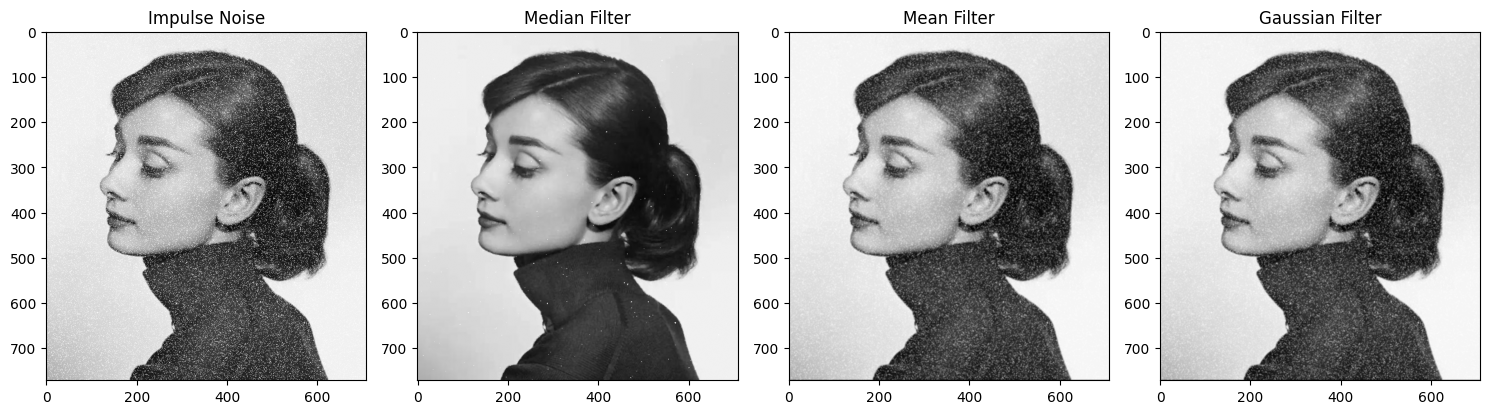

In [125]:
# Add impulse noise
impulse_img = add_impulse_noise(img, 0.1)

# Display noisy image and the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')	
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(impulse_img, cmap='gray')
plt.title('Impulse Noise')
plt.axis('off')

# Apply filters
median_denoised_img = median_filter(impulse_img)
mean_denoised_img = mean_filter(impulse_img)
gaussian_denoised_img = gaussian_filter(impulse_img, size=3, sigma=3.0)

# Display denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(impulse_img, cmap='gray')
plt.title('Impulse Noise')

plt.subplot(1, 4, 2)
plt.imshow(median_denoised_img, cmap='gray')
plt.title('Median Filter')

plt.subplot(1, 4, 3)
plt.imshow(mean_denoised_img, cmap='gray')
plt.title('Mean Filter')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_denoised_img, cmap='gray')
plt.title('Gaussian Filter')


plt.tight_layout()
plt.show()

### Gaussian Noise

gauss: [[0.06087649 0.09728035 0.08857477]
 [0.09728035 0.15545356 0.14154208]
 [0.08857477 0.14154208 0.12887553]]


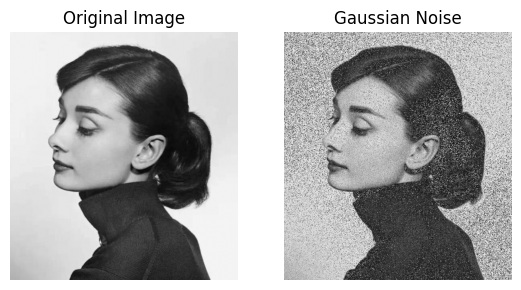

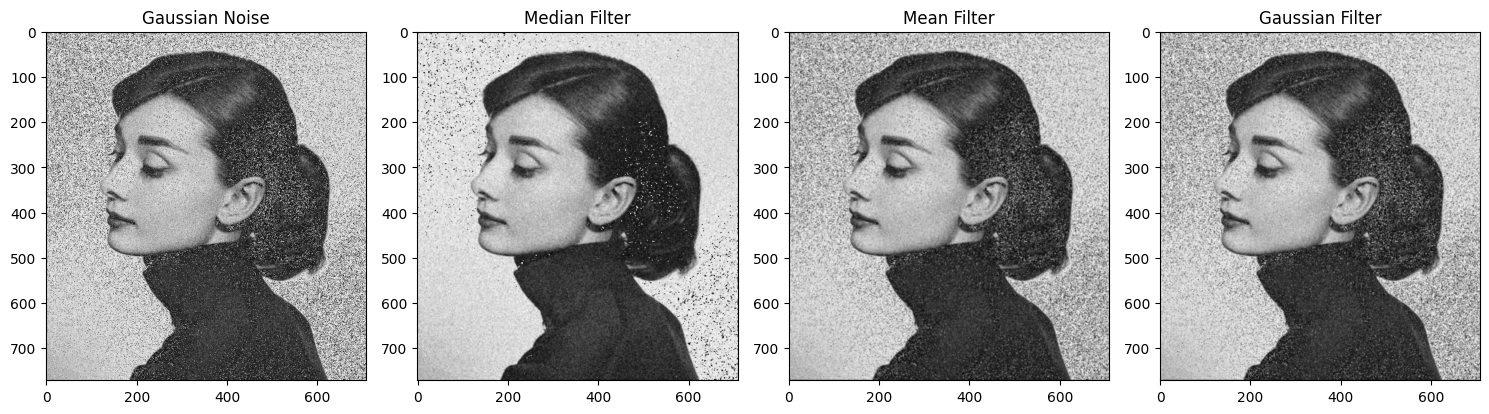

In [126]:
# Add gaussian noise
gaussian_img = add_gaussian_noise(img, 0, 25)

# Display noisy image and the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

# Apply filters
median_denoised_img = median_filter(gaussian_img)
mean_denoised_img = mean_filter(gaussian_img)
gaussian_denoised_img = gaussian_filter(gaussian_img, size=3, sigma=2.0)

# Display denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(1, 4, 2)
plt.imshow(median_denoised_img, cmap='gray')
plt.title('Median Filter')

plt.subplot(1, 4, 3)
plt.imshow(mean_denoised_img, cmap='gray')
plt.title('Mean Filter')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_denoised_img, cmap='gray')
plt.title('Gaussian Filter')

plt.tight_layout()
plt.show()

## Comparison of Results

This notebook demonstrates the effects of different types of noise on an image and compares the performance of median and mean filters for denoising. The PSNR values provide a quantitative measure of the denoising performance.